# Medical Insurance Project

First, let's import, then inspect the data. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('insurance.csv')

print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


Next, let's analyze some general statistics. 

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64


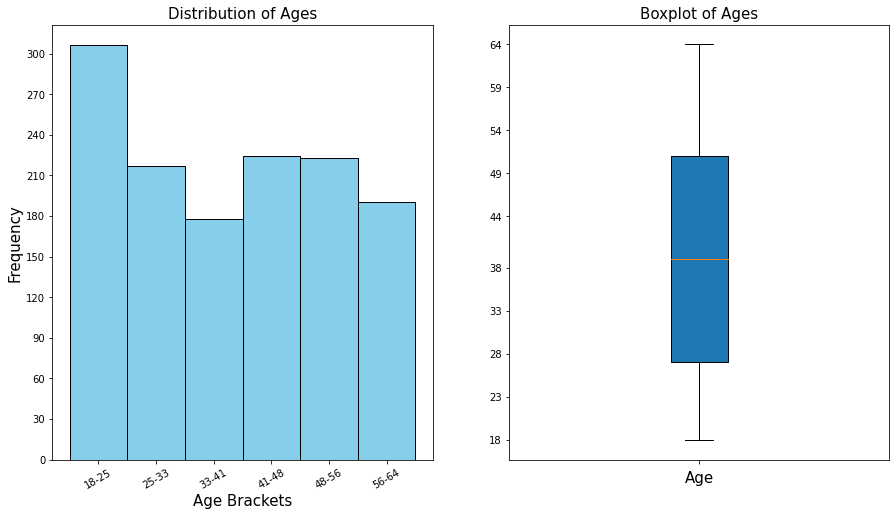

In [27]:
print(df['age'].describe())

ax1=plt.subplot(1,2,1)

plt.rcParams['figure.figsize']=(20,10)
plt.hist(df['age'],histtype='bar',color='skyblue',bins=6,edgecolor='black')
plt.xlabel('Age Brackets',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Distribution of Ages',fontsize=15)

m=df.age.min()
M=df.age.max()
X=np.arange(m,M,(M-m)/6)
mid=[]
L=[]

for i in range(len(X)-1):
    mid.append((X[i]+X[i+1])/2)
mid.append((X[-1]+M)/2)

for i in range(len(X)-1):
    L.append(str(int(X[i]))+'-'+str(int(X[i+1])))
L.append(str(int(X[-1]))+'-'+str(int(M)))

ax1.set_xticks(mid)
ax1.set_xticklabels(L)
plt.xticks(rotation=30)

Y=np.arange(0,330,300/10)
ax1.set_yticks(Y)

ax2=plt.subplot(1,2,2)
YY=np.linspace(m,M,10)
YY=[np.round(y) for y in YY]
plt.boxplot(df['age'], patch_artist=True)
plt.xlabel('Age',fontsize=15)
ax2.set_yticks(YY)
ax2.set_xticklabels('')
plt.title('Boxplot of Ages',fontsize=15)
plt.show()

Now, let's see how the genders are distributed.

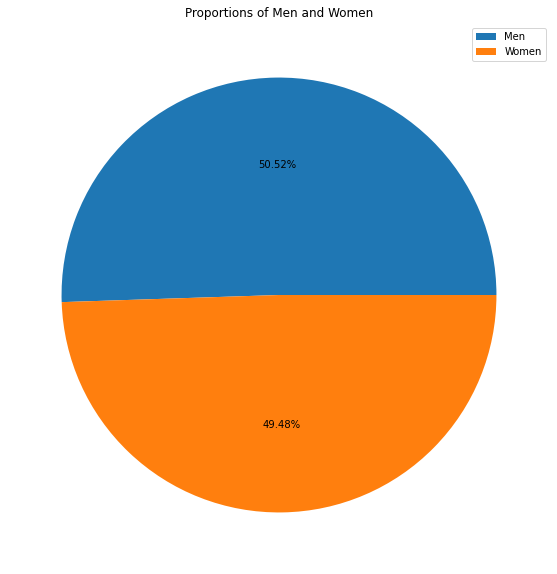

In [29]:
props_gender=df['sex'].value_counts()/len(df)
plt.pie(props_gender,autopct="%.2f%%")
plt.legend(['Men','Women'])
plt.title('Proportions of Men and Women')
plt.axis()
plt.rcParams['figure.figsize']=(20,10)
plt.show()

From the pie chart above, we see that our sample population is roughly half men and half women. Similarly, we can do a similar analysis for the proportions of smokers and non-smokers.

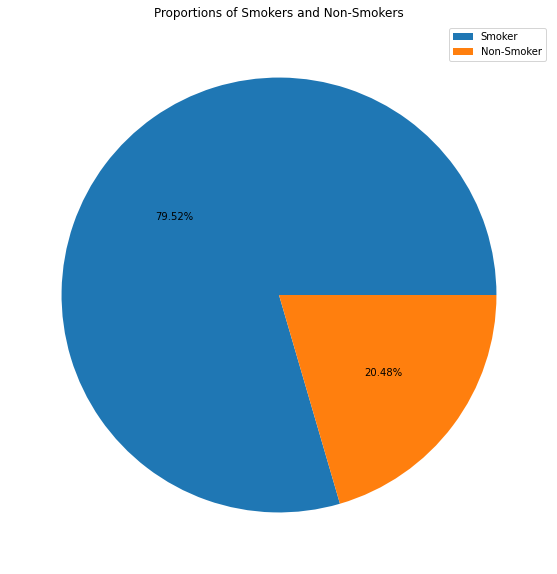

In [30]:
props_smokers=df['smoker'].value_counts()/len(df)
plt.pie(props_smokers,autopct="%.2f%%")
plt.legend(['Smoker','Non-Smoker'])
plt.title('Proportions of Smokers and Non-Smokers')
plt.axis()
plt.rcParams['figure.figsize']=(20,10)
plt.show()

From this, we see that most of our sample, almost 80 percent, are smokers. But what about their BMI's? 

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64


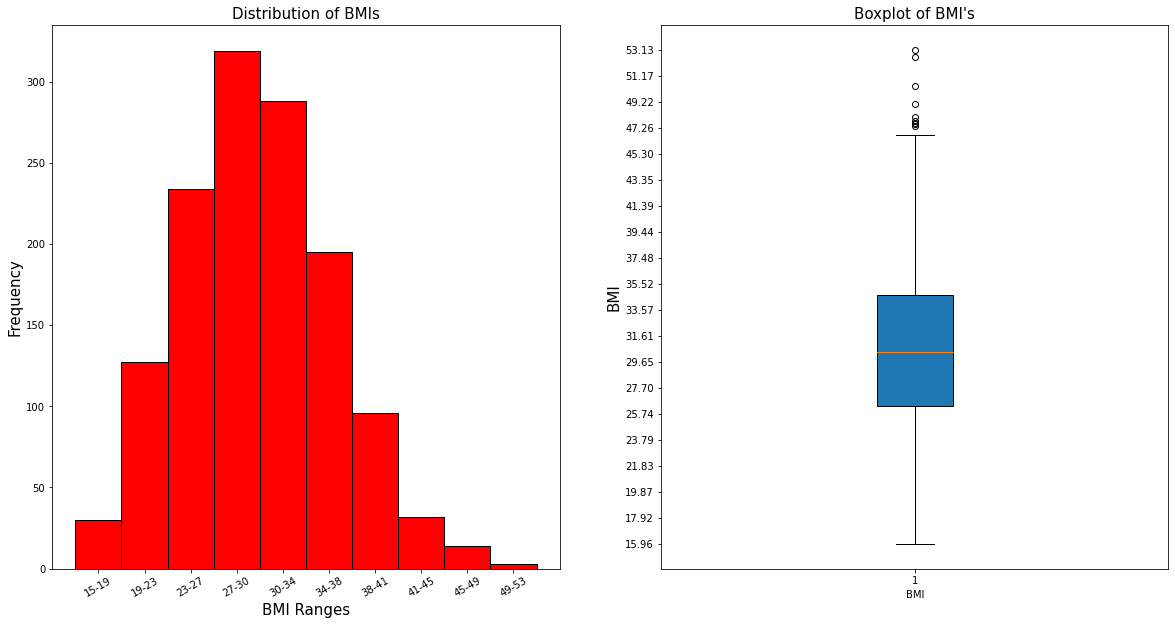

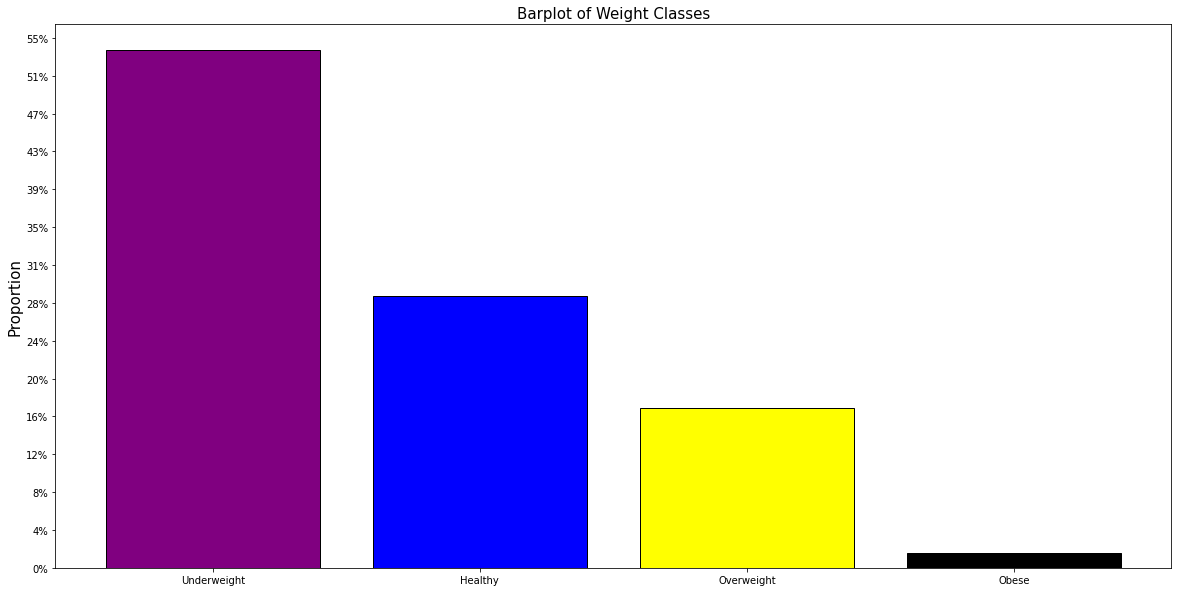

In [58]:
print(df['bmi'].describe())
ax1=plt.subplot(1,2,1)
plt.hist(df['bmi'],histtype='bar',color='red',edgecolor='black')
plt.title('Distribution of BMIs',fontsize=15)
plt.xlabel('BMI Ranges',fontsize=15)
plt.ylabel('Frequency',fontsize=15)

m=df.bmi.min()
M=df.bmi.max()
X=np.arange(m,M,(M-m)/10)
mid=[]
L=[]

for i in range(len(X)-1):
    mid.append((X[i]+X[i+1])/2)
mid.append((X[-1]+M)/2)

for i in range(len(X)-1):
    L.append(str(int(X[i]))+'-'+str(int(X[i+1])))
L.append(str(int(X[-1]))+'-'+str(int(M)))

ax1.set_xticks(mid)
ax1.set_xticklabels(L)
plt.xticks(rotation=30)


ax2=plt.subplot(1,2,2)
plt.boxplot(df['bmi'],patch_artist=True)
plt.title("Boxplot of BMI's",fontsize=15)
plt.xlabel("BMI")
plt.ylabel('BMI',fontsize=15)

Y=np.linspace(m,M,20)
ax2.set_yticks(Y)

plt.show()
plt.clf()

fig=plt.subplot()
def weight_class(bmi):
    if bmi<18.5:
        return 'underweight'
    elif (bmi>=18.5) & (bmi<=24.9):
        return 'healthy'
    elif (bmi>=25) & (bmi<=29.9):
        return 'overweight'
    else:
        return 'obese'
    
df['weight_class']=df.bmi.apply(weight_class)

props_weight = df['weight_class'].value_counts()/len(df)

plt.bar(['Underweight','Healthy','Overweight','Obese'],props_weight,color=['Purple','Blue','Yellow','Black'],edgecolor='black')
plt.title('Barplot of Weight Classes',fontsize=15)
plt.ylabel('Proportion', fontsize=15)

YY=np.linspace(0.0,0.55,15)
fig.set_yticks(YY)

L=[]
for y in YY:
    l=round(100*y)
    L.append(str(l)+'%')

fig.set_yticklabels(L)

plt.show()